# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [13]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

zsh:1: command not found: gdown
zsh:1: command not found: gdown
zsh:1: command not found: gdown


In [2]:
data = pd.read_csv('./train.csv')

In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
data.shape #5282 объекта, 20 признаков

(5282, 20)

In [5]:
data.info() #потом смотрим типы данных, можно заметить расхождения в колонке  Toral Spent, где его Dtype отображен как тип object, хотя в самих даннных он относится к числовым признакам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
data.sample(10) #случайные строки

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4662,38,68.15,2656.3,Female,0,No,No,Yes,Yes,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,No,Credit card (automatic),0
240,25,20.95,495.15,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
1434,65,91.55,5963.95,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
1191,43,92.55,4039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0
4811,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
4605,17,86.75,1410.25,Male,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,One year,No,Electronic check,0
3207,12,20.05,264.55,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic check,0
346,10,78.15,765.15,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
2971,7,29.80,220.45,Male,1,Yes,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),0
4379,3,55.35,165.2,Female,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,1


In [9]:
data.isna().sum() #проверка на наличие нанов

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [10]:
data.duplicated().sum() #проверка на дублирующие строки - находим 14 дублей

14

In [11]:
data = data.drop_duplicates() #удаляем дубли из датасета
data.shape

(5268, 20)

In [12]:
data = data.convert_dtypes()
data.dtypes #проверим тип объектов

ClientPeriod                  Int64
MonthlySpending             Float64
TotalSpent                   string
Sex                          string
IsSeniorCitizen               Int64
HasPartner                   string
HasChild                     string
HasPhoneService              string
HasMultiplePhoneNumbers      string
HasInternetService           string
HasOnlineSecurityService     string
HasOnlineBackup              string
HasDeviceProtection          string
HasTechSupportAccess         string
HasOnlineTV                  string
HasMovieSubscription         string
HasContractPhone             string
IsBillingPaperless           string
PaymentMethod                string
Churn                         Int64
dtype: object

In [13]:
for i in range(len(feature_cols)):
    print(data[feature_cols[i]].value_counts())

1     443
72    284
2     165
3     162
4     136
     ... 
57     39
39     35
44     34
36     34
0       9
Name: ClientPeriod, Length: 73, dtype: Int64
20.05    45
19.65    34
19.95    34
20.0     33
19.7     32
         ..
87.3      1
68.9      1
67.2      1
86.3      1
98.2      1
Name: MonthlySpending, Length: 1468, dtype: Int64
           9
19.75      8
20.2       7
20.05      5
19.9       5
          ..
5293.95    1
1021.75    1
7317.1     1
662.65     1
1375.6     1
Name: TotalSpent, Length: 4978, dtype: Int64
Male      2647
Female    2621
Name: Sex, dtype: Int64
0    4427
1     841
Name: IsSeniorCitizen, dtype: Int64
No     2691
Yes    2577
Name: HasPartner, dtype: Int64
No     3662
Yes    1606
Name: HasChild, dtype: Int64
Yes    4747
No      521
Name: HasPhoneService, dtype: Int64
No                  2497
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: Int64
Fiber optic    2335
DSL            1798
No             1135
Name: HasInternetS

In [14]:
data[data['TotalSpent'] == ' ']
#видим, что в этих объектах 'ClientPeriod' равно нулю, видимо, данные о тратах не успели  накопиться или отсутствуют

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.7,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.0,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.9,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [16]:
#заменим пропуски нулями
data['TotalSpent'] = data['TotalSpent'].replace(' ', '0')
#переводим в численный формат
data['TotalSpent'] = data['TotalSpent'].astype(float)
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.5,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.9,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.3,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.4,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.0,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [17]:
#Для согласованности представления с остальными категориальными признаками переведем признак IsSeniorCitizen в текстовую форму:

print("Возможные значения IsSeniorCitizen до преобразования:\n")
print(data['IsSeniorCitizen'].value_counts())
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].astype('object')
data.loc[data['IsSeniorCitizen'] == 1, 'IsSeniorCitizen'] = 'Yes'
data.loc[data['IsSeniorCitizen'] == 0, 'IsSeniorCitizen'] = 'No'
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].astype('string')
print("\nВозможные значения IsSeniorCitizen после преобразования:\n")
print(data['IsSeniorCitizen'].value_counts())
print("\nТипы после преобразования:")
data.dtypes

Возможные значения IsSeniorCitizen до преобразования:

0    4427
1     841
Name: IsSeniorCitizen, dtype: Int64

Возможные значения IsSeniorCitizen после преобразования:

No     4427
Yes     841
Name: IsSeniorCitizen, dtype: Int64

Типы после преобразования:


ClientPeriod                  Int64
MonthlySpending             Float64
TotalSpent                  float64
Sex                          string
IsSeniorCitizen              string
HasPartner                   string
HasChild                     string
HasPhoneService              string
HasMultiplePhoneNumbers      string
HasInternetService           string
HasOnlineSecurityService     string
HasOnlineBackup              string
HasDeviceProtection          string
HasTechSupportAccess         string
HasOnlineTV                  string
HasMovieSubscription         string
HasContractPhone             string
IsBillingPaperless           string
PaymentMethod                string
Churn                         Int64
dtype: object

In [18]:
#Проверка данных на отсуствующие значения

table = data.isna().sum()
print("Количество nan по колонкам:", table, sep="\n\n")
print("\nПропуски в данных:", "нет" if (table == 0).all() else "есть")
print("Список колонок, в которых есть пропуски:", ', '.join(table[table != 0].index))

Количество nan по колонкам:

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пропуски в данных: нет
Список колонок, в которых есть пропуски: 


# Анализ данных (3 балла)
Для численных призанков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...)). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать data.value_counts() и построить bar диаграммы plt.bar(...) или круговые диаграммы plt.pie(...) (хорошо, елси вы сможете это сделать на одном гарфике с помощью plt.subplots(...)).

Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

(Если будет желание) Поиграйте с разными библиотеками для визуализации - sns, pandas_visual_analysis, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).



# #2: Aнализ данных

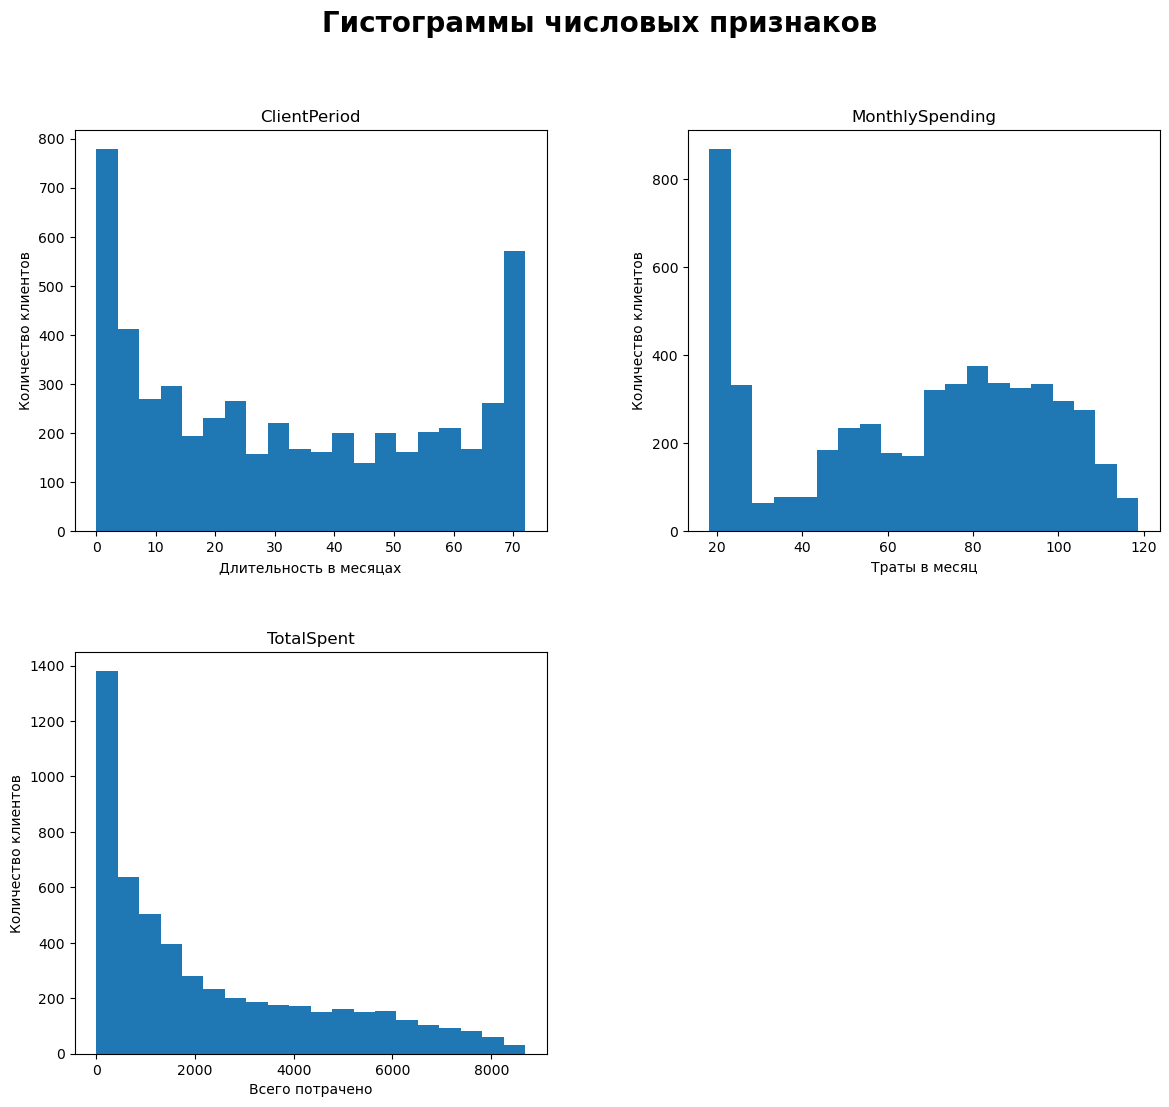

In [19]:
#графики для числовых признаков

%matplotlib inline
import matplotlib.pyplot as plt

col_labels = ["Длительность в месяцах", "Траты в месяц", "Всего потрачено"]
subplots_shape = (2, 2)
fig = plt.figure(figsize=(14, 12))
fig.suptitle("Гистограммы числовых признаков", fontweight="bold", fontsize=20)
for i, (col, xlabel) in enumerate(zip(num_cols, col_labels), 1):
    ax = plt.subplot(*subplots_shape, i)
    ax.set_title(col, fontsize=16, fontweight="bold")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Количество клиентов")
    data.hist(column=col, ax=ax, bins=20, grid=False)


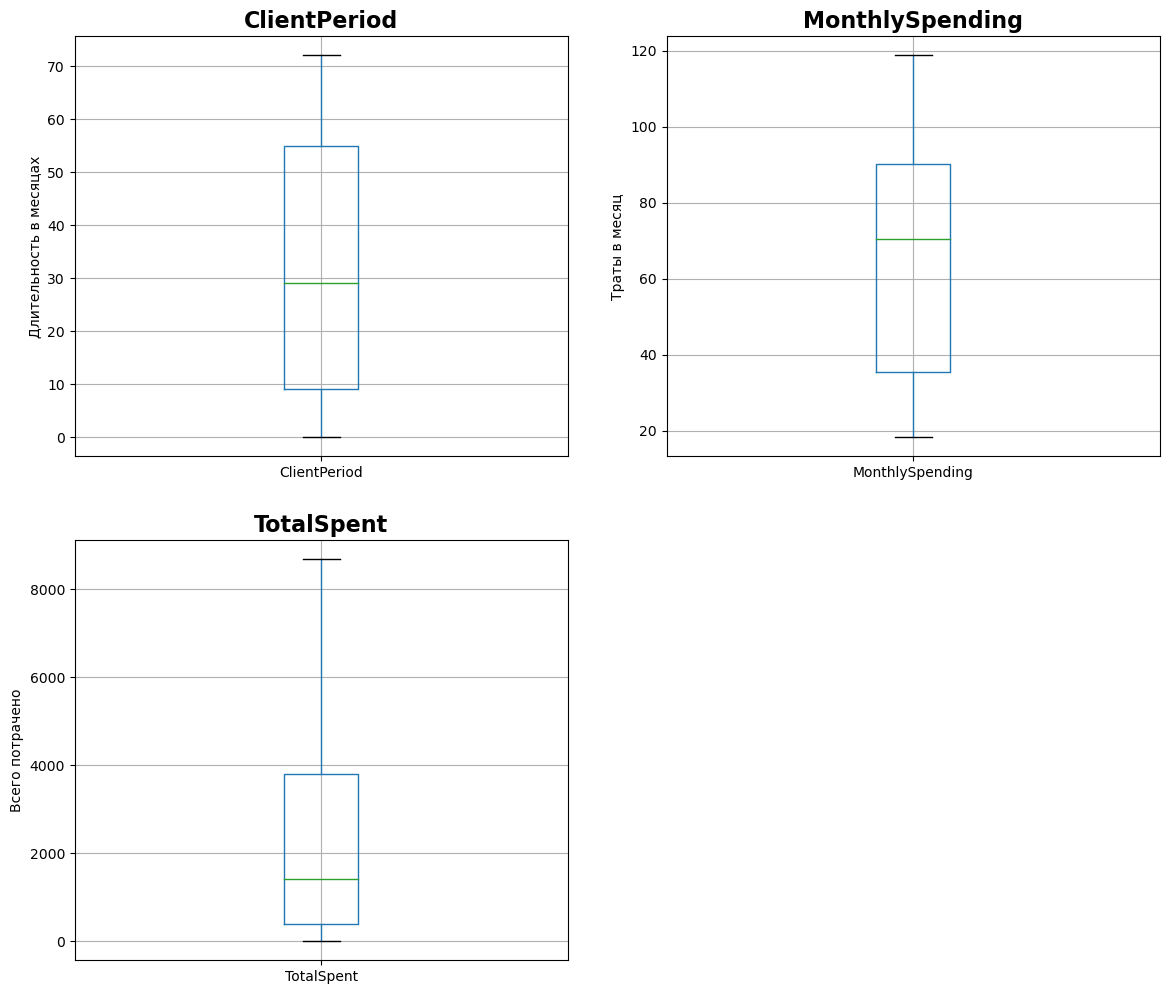

In [20]:
#рассмотрим размах числовых признаков, boxplot

fit = plt.figure(figsize=(14, 12))
fig.suptitle("Диаграммы размаха числовых признаков", fontweight="bold", fontsize=20)

for i, (col, ylabel) in enumerate(zip(num_cols, col_labels), 1):
    ax = plt.subplot(*subplots_shape, i)
    ax.set_title(col, fontsize=16, fontweight="bold")
    ax.set_ylabel(ylabel)
    data.boxplot(column=col, ax=ax)

In [22]:
#выведем количество знаний категориального признака
for col in cat_cols:
    print("Количество значений категориального признака {}:\n".format(col))
    print(data[col].value_counts())
    print()

Количество значений категориального признака Sex:

Male      2647
Female    2621
Name: Sex, dtype: Int64

Количество значений категориального признака IsSeniorCitizen:

No     4427
Yes     841
Name: IsSeniorCitizen, dtype: Int64

Количество значений категориального признака HasPartner:

No     2691
Yes    2577
Name: HasPartner, dtype: Int64

Количество значений категориального признака HasChild:

No     3662
Yes    1606
Name: HasChild, dtype: Int64

Количество значений категориального признака HasPhoneService:

Yes    4747
No      521
Name: HasPhoneService, dtype: Int64

Количество значений категориального признака HasMultiplePhoneNumbers:

No                  2497
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: Int64

Количество значений категориального признака HasInternetService:

Fiber optic    2335
DSL            1798
No             1135
Name: HasInternetService, dtype: Int64

Количество значений категориального признака HasOnlineSecuritySer

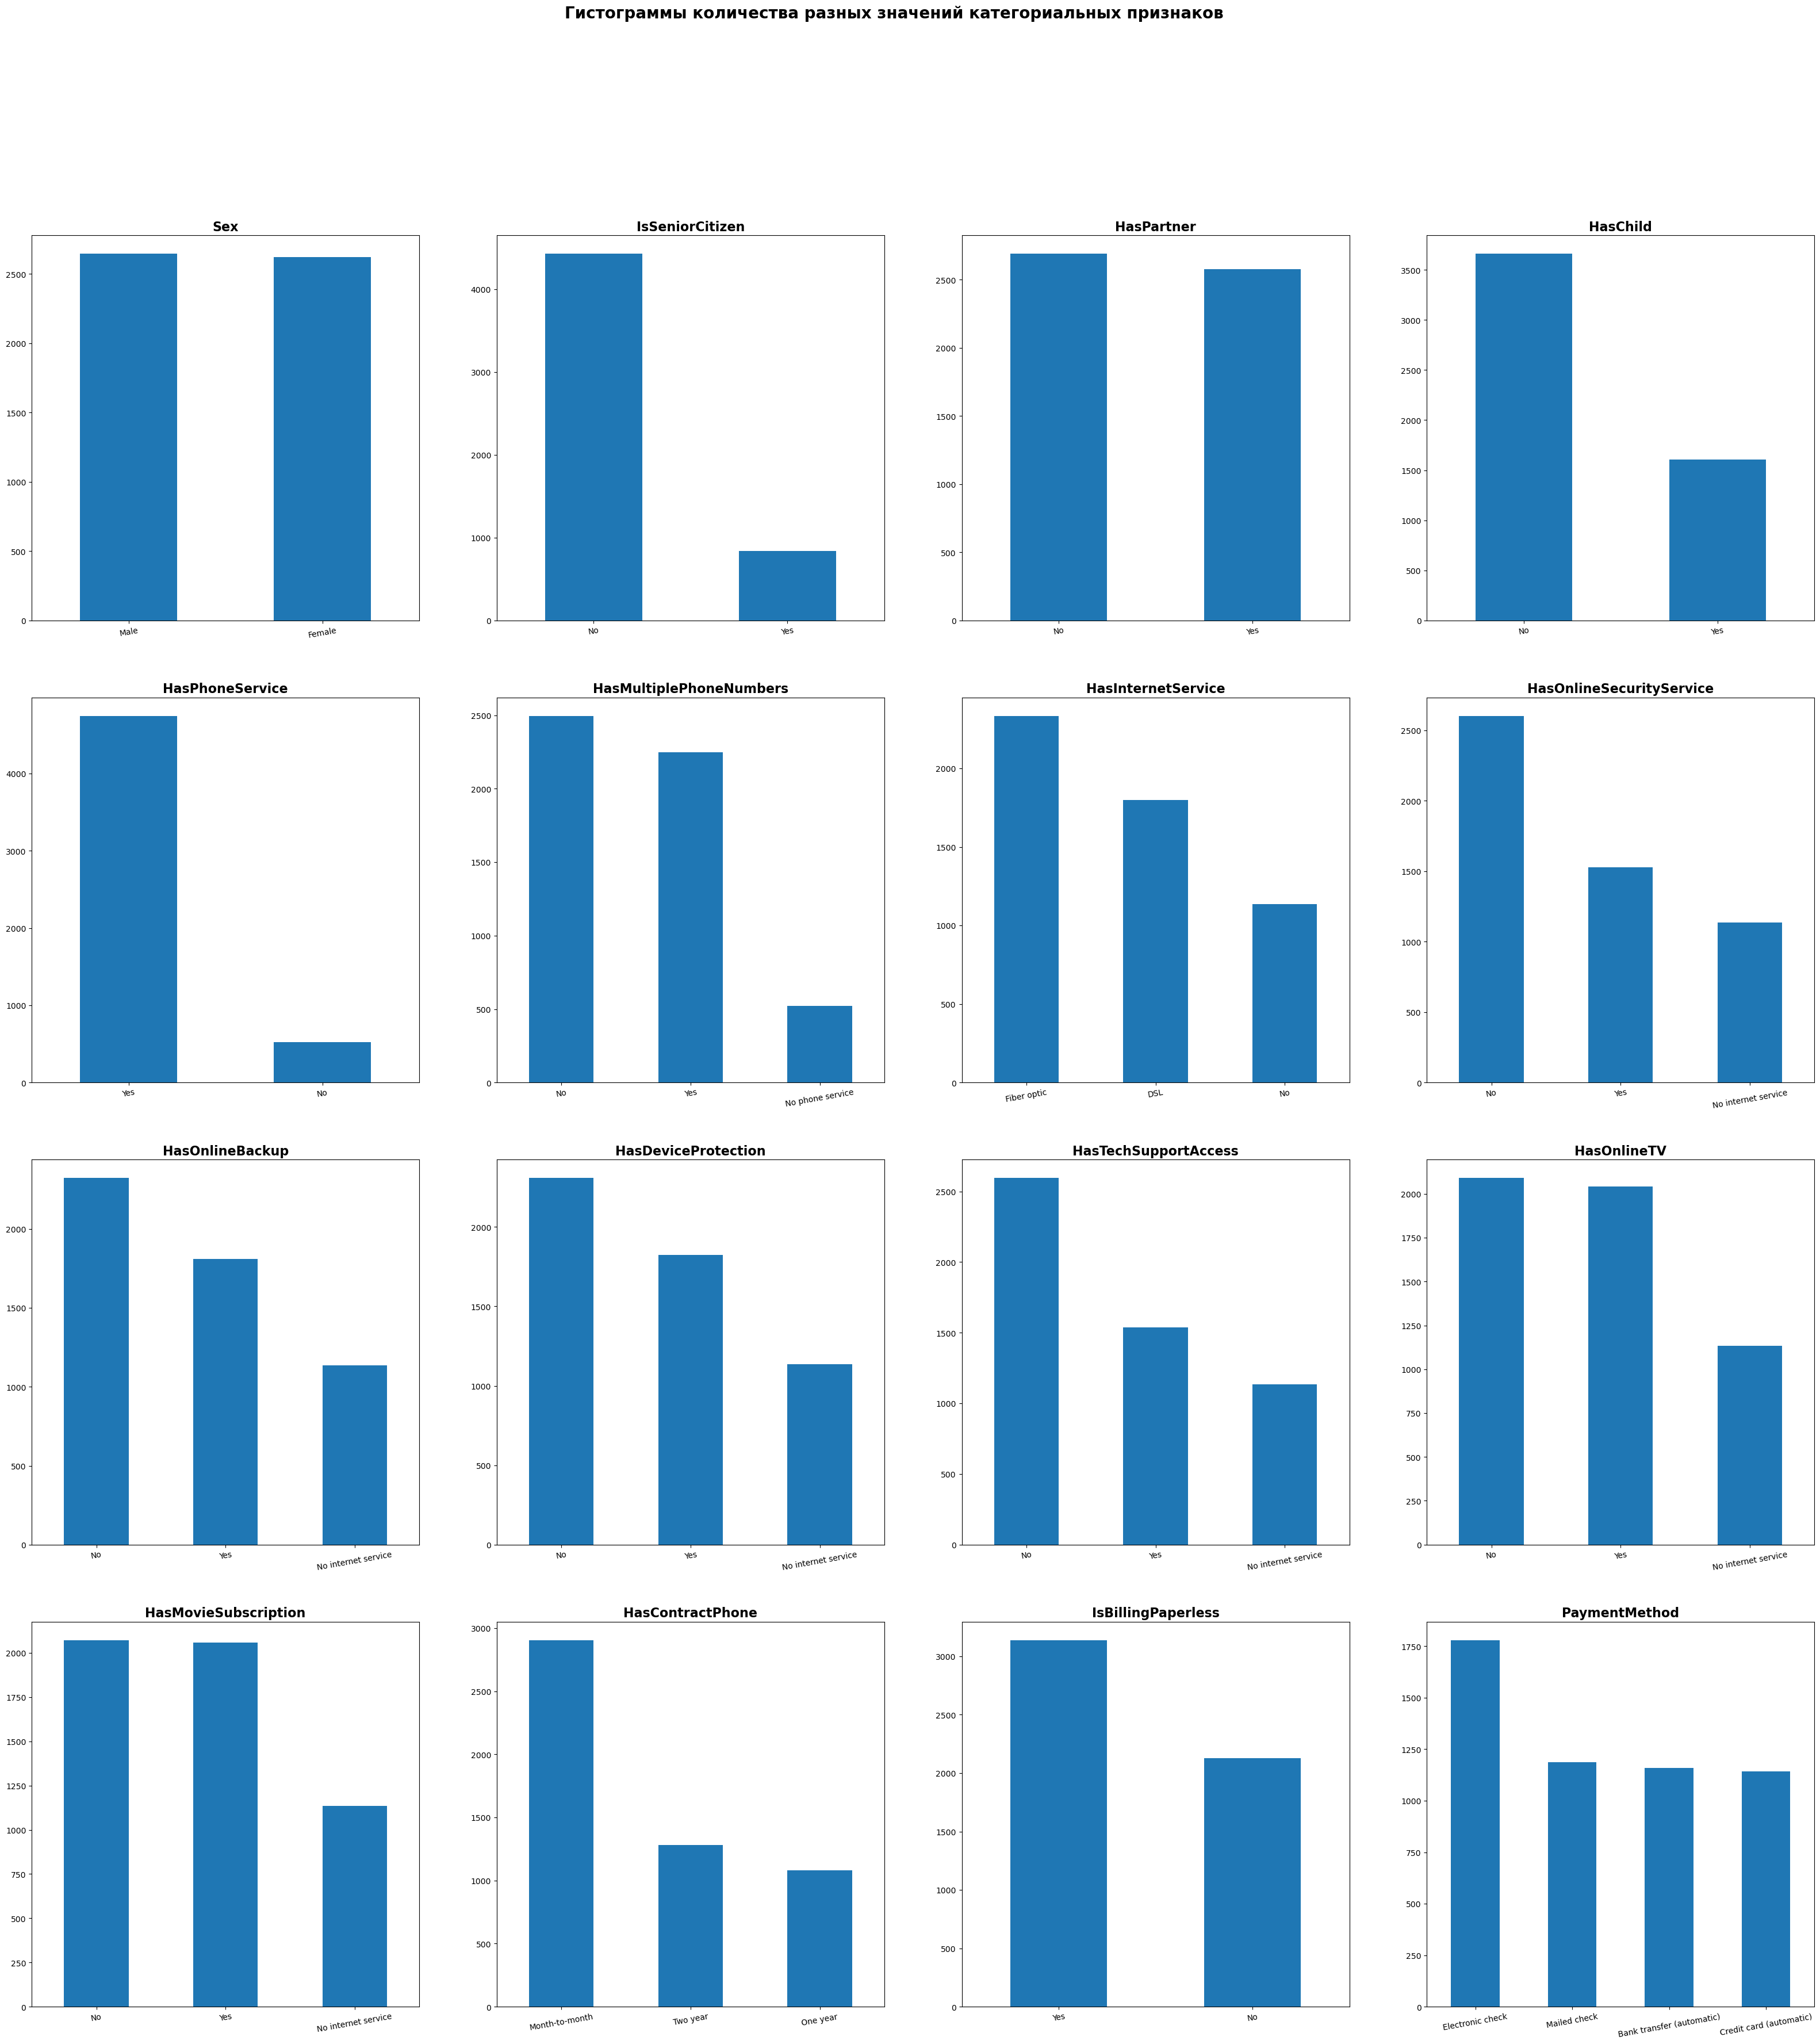

In [23]:
#построим столбчатые диаграммы для категориальных признаков

cat_cols_num = len(cat_cols)
cells_by_horizontal = min(4, int(np.ceil(np.sqrt(cat_cols_num))))
cells_by_vertical = int(np.ceil(cat_cols_num / cells_by_horizontal))
subplots_shape = (cells_by_vertical, cells_by_horizontal)
fig = plt.figure(figsize=(10 * cells_by_horizontal , 10 * cells_by_vertical))
fig.suptitle("Гистограммы количества разных значений категориальных признаков", fontweight="bold", fontsize=20)


for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(*subplots_shape, i)
    ax.set_title(col, fontsize=16, fontweight="bold")
    
    data[col].value_counts().plot.bar(rot=10)


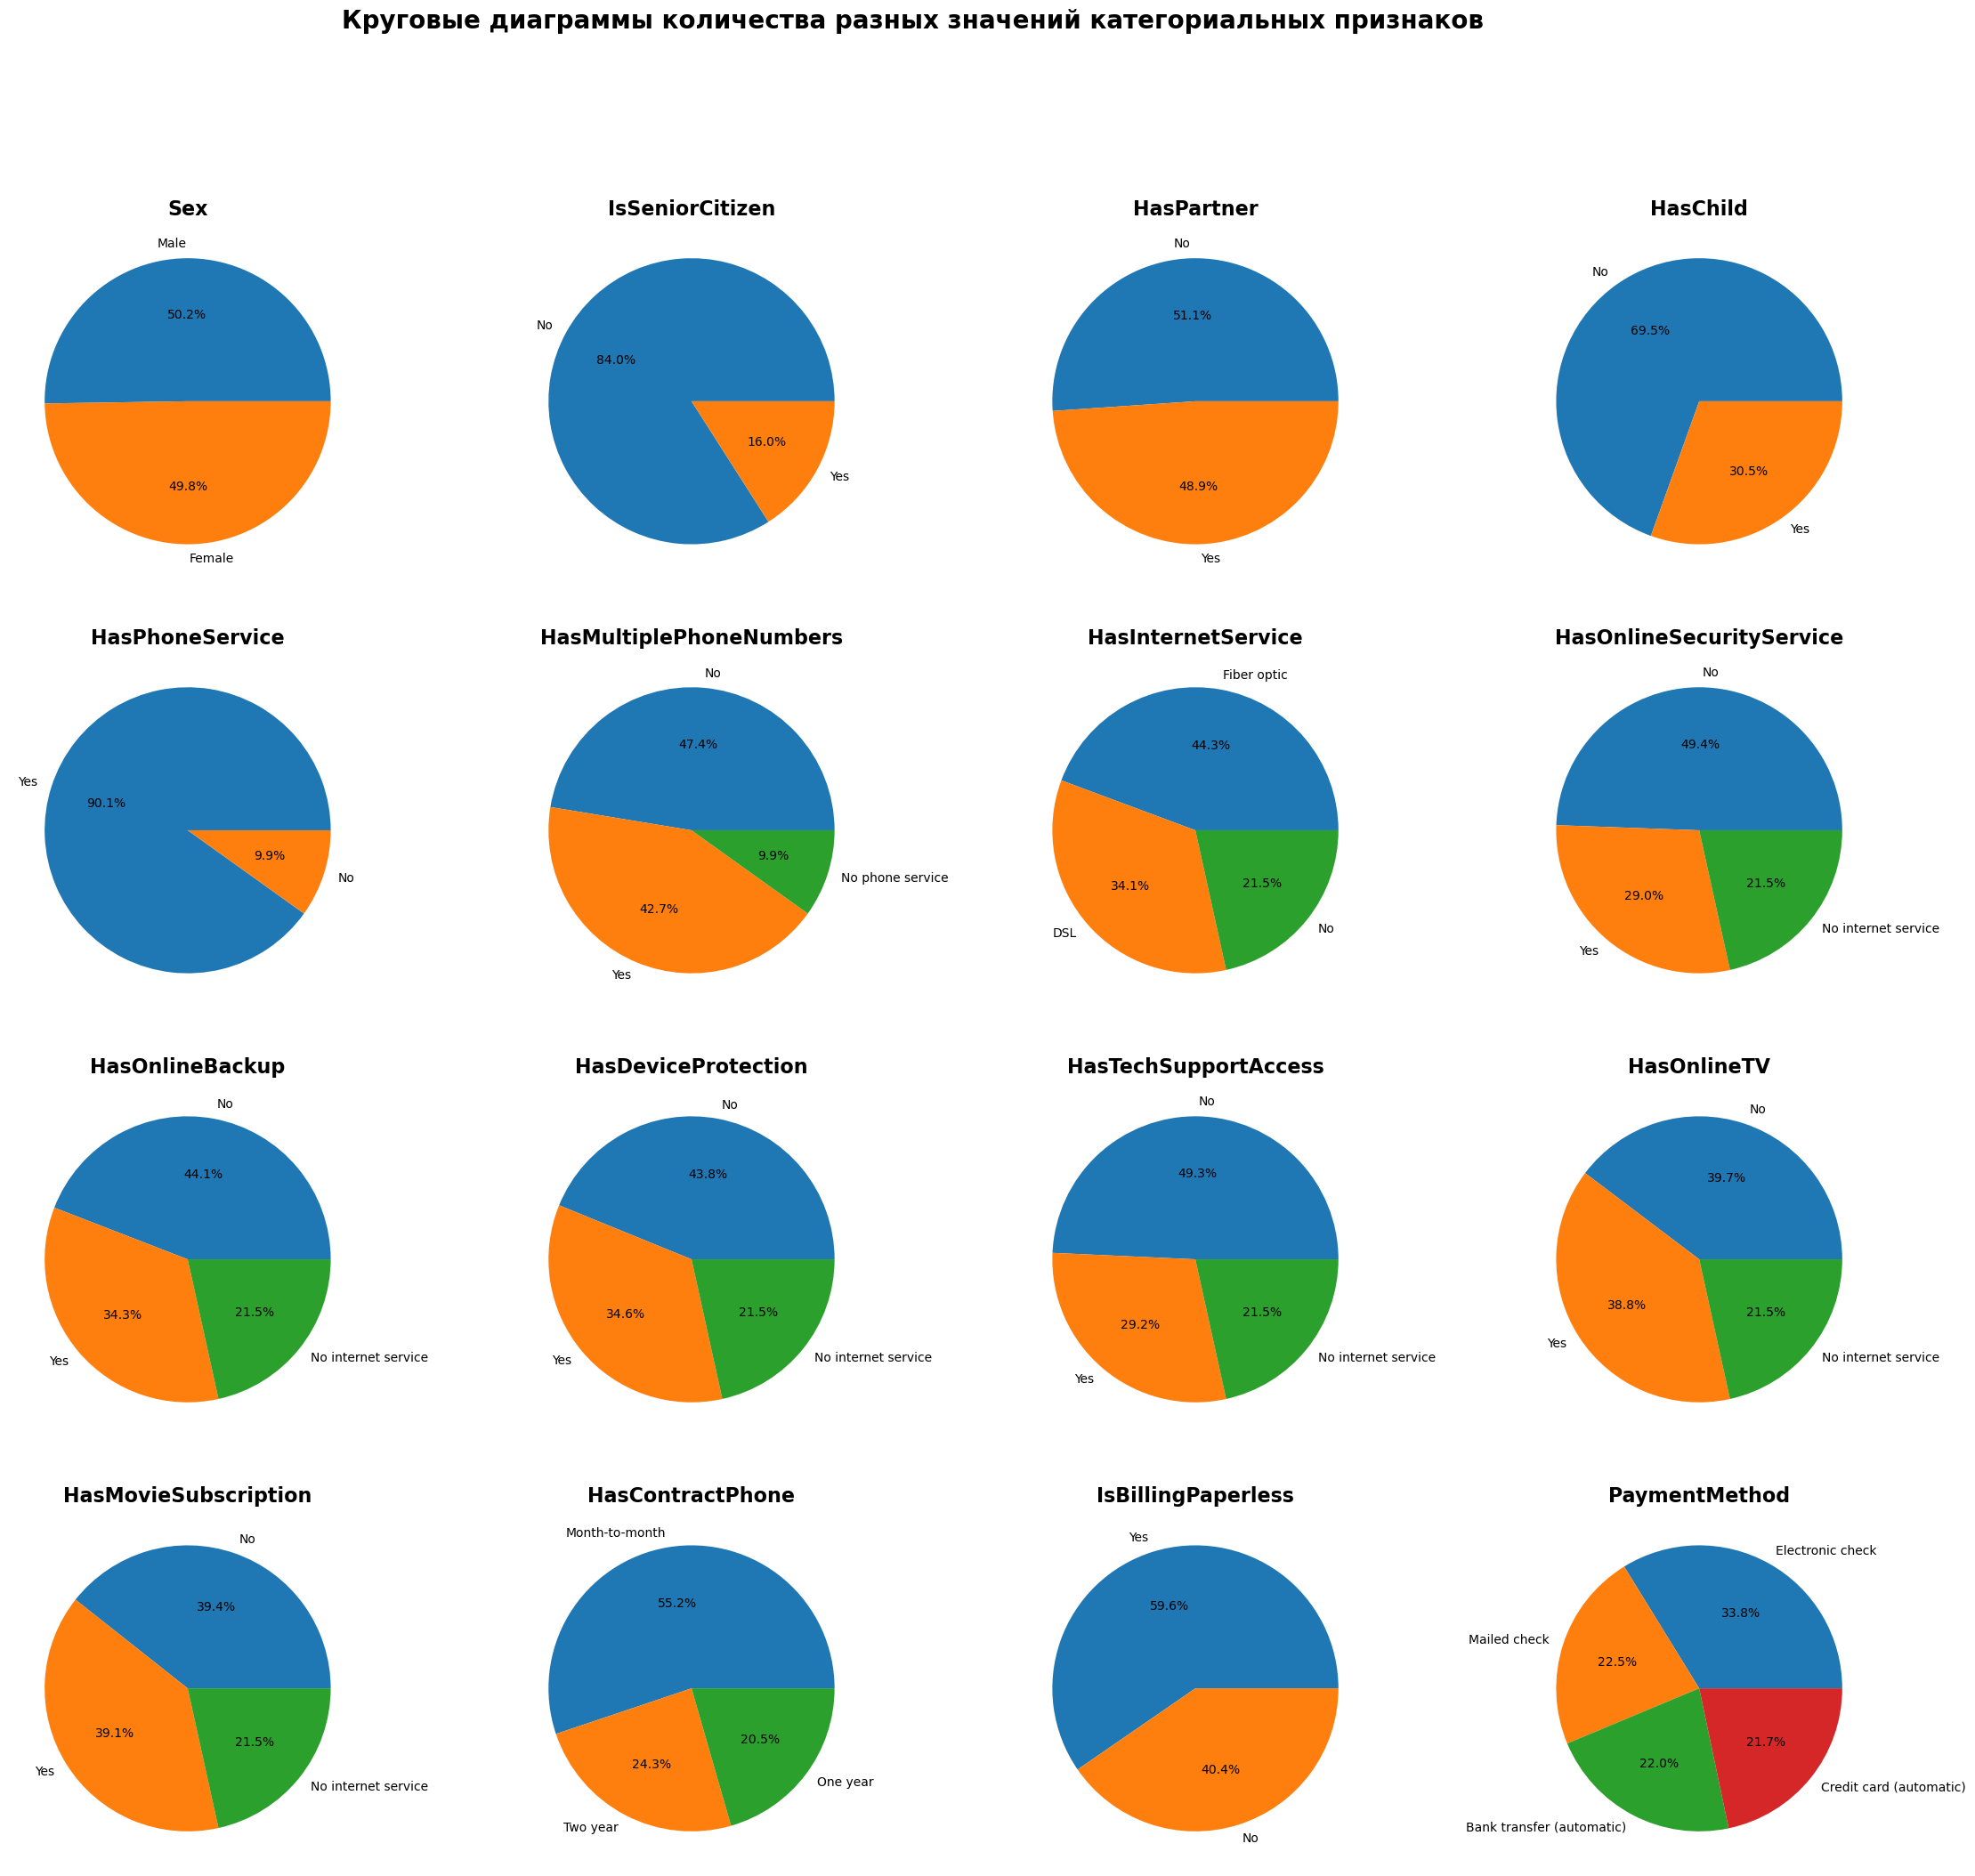

In [24]:
fig = plt.figure(figsize=(7 * cells_by_horizontal , 6 * cells_by_vertical))
fig.suptitle("Круговые диаграммы количества разных значений категориальных признаков", fontweight="bold", fontsize=20)

for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(*subplots_shape, i)
    ax.set_title(col, fontsize=16, fontweight="bold")
    
    data[col].value_counts().plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_ylabel(None)

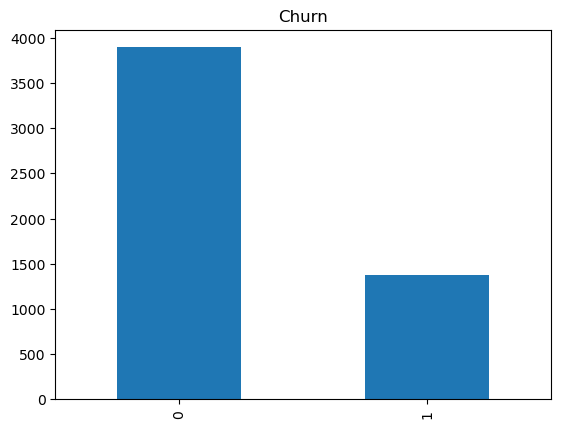

In [25]:
#распределение целевой переменной
tvc = data[target_col].value_counts()
tvc.plot.bar(title=target_col);

In [26]:
tol = 0.2
target_class_percentage = tvc.loc[1] / sum(tvc)
print("Вывод: классы", "" if abs(target_class_percentage - 0.5) < tol else "не", "сбалансированы")

Вывод: классы не сбалансированы


**Применение линейных моделей (3 балла)**
Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).

(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_p

In [28]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [30]:
#Построим пайплайн для обработки данных и последующего обучения модели

class DataTransformer:
    def __init__(self, num_cols, cat_cols, drop=None):
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self._scaler = StandardScaler()
        self._one_hot_encoder = OneHotEncoder(sparse=False, drop=drop)

    def clear_data(self, data):
        data.loc[data['IsSeniorCitizen'] == 1, 'IsSeniorCitizen'] = 'Yes'
        data.loc[data['IsSeniorCitizen'] == 0, 'IsSeniorCitizen'] = 'No'
        data = data.convert_dtypes()
        data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
        data = data.fillna(data.mean())
        return data

    def fit(self, data, target=None):
        data = self.clear_data(data)
        self._scaler.fit(data[self.num_cols]) 
        self._one_hot_encoder.fit(data[self.cat_cols])

    def transform(self, data, target=None):
        data = self.clear_data(data)
        scaled_num_cols = self._scaler.transform(data[self.num_cols])
        encoded_cat_cols = self._one_hot_encoder.transform(data[self.cat_cols])
        return np.hstack((scaled_num_cols, encoded_cat_cols))

    def fit_transform(self, data, target=None):
        data = self.clear_data(data)
        scaled_num_cols = self._scaler.fit_transform(data[self.num_cols])
        encoded_cat_cols = self._one_hot_encoder.fit_transform(data[self.cat_cols])
        return np.hstack((scaled_num_cols, encoded_cat_cols))

from sklearn.pipeline import Pipeline

clsf = Pipeline(steps=[('datatransformer', DataTransformer(num_cols, cat_cols, drop='first')), ('logistic', LogisticRegression(random_state=42))])

In [33]:
#Найдем лучшие параметры
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

grid_search = GridSearchCV(clsf, param_grid={'logistic__C': [100, 10, 1, 0.1, 0.01, 0.001]},
                               cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=make_scorer(roc_auc_score), n_jobs=-1,
                               verbose=10)
X, y = data[feature_cols], data[target_col].astype('int8')
grid_search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('datatransformer',
                                        <__main__.DataTransformer object at 0x000001C604C6CB80>),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic__C': [100, 10, 1, 0.1, 0.01, 0.001]},
             scoring=make_scorer(roc_auc_score), verbose=10)

In [34]:
print("Лучшее качество: {} с параметрами {}".format(grid_search.best_score_, grid_search.best_params_))

Лучшее качество: 0.7194553226279405 с параметрами {'logistic__C': 100}


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

In [36]:
from catboost import CatBoostClassifier

In [40]:
# Разделяем на обучающую и тестовую выборку
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение классификатора
model = CatBoostClassifier(cat_features=cat_cols, random_seed=42)
model.fit(X_train, y_train, verbose=False)

# Прогнозирование вероятностей на валидационной выборке
probas = model.predict_proba(X_valid)
valid_preds = probas[:, 1]

print(roc_auc_score(y_valid, valid_preds))

0.8447952010238798


In [41]:
# ROC-AUC score: 0.8416820004718094

In [ ]:
# Тестирование разных значений для n_estimators и learning_rate
best_auc = 0
best_params = {}

for n_estimators in [100, 200, 300]:
    for learning_rate in [0.1, 0.01, 0.001]:
        model = CatBoostClassifier(cat_features=cat_cols, n_estimators=n_estimators, learning_rate=learning_rate, random_seed=42)
        model.fit(X_train, y_train, verbose=False)
        probas = model.predict_proba(X_valid)[:, 1]
        roc_auc = roc_auc_score(y_valid, probas)
        if roc_auc > best_auc:
            best_auc = roc_auc
            best_params = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

print(best_auc, best_params, sep='\n')

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Best ROC-AUC score: 0.8433474876150034
Best parameters: {'n_estimators': 100, 'learning_rate': 0.1}

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (<ipython-input-12-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.